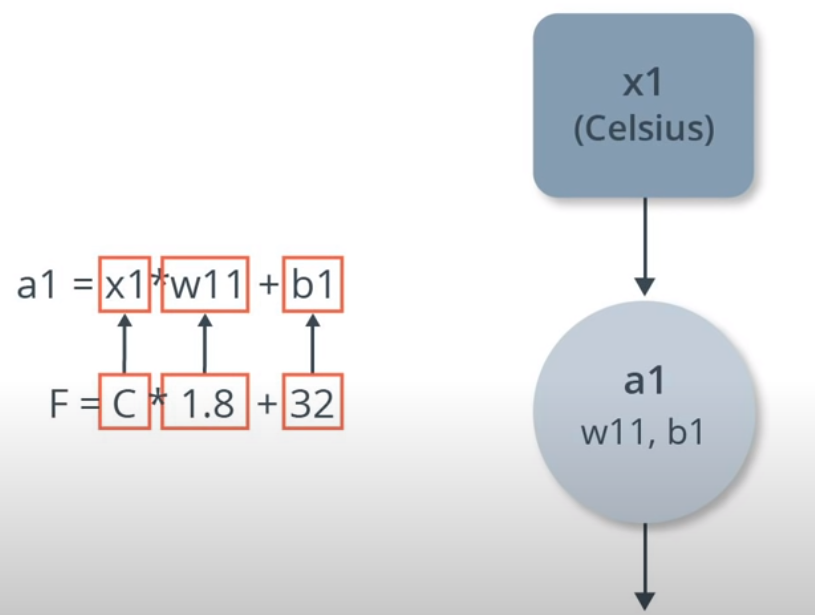

In [7]:
# importing the required modules
import tensorflow as tf
import numpy as np

# setting up the required dataset
celsius = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float) #input data
fahrenheit = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)  #target data

# setting up the layer
l0 = tf.keras.layers.Dense(units=1, input_shape=[1]) 

'''
A dense layer is a fully connected layer, where each neuron is connected to every neuron in the previous layer
units ==> no.of neurons in the layer
input_shape ==> shape of the input data fed into this layer
input_shape = [1] ==> one-dimensional array with single element
'''

# create a sequential model which consists of a single layer 
model = tf.keras.Sequential([l0])

# compile the model with a given loss function and a optimization algorithm
# the goal is to minimize the loss between the actual and predicted values by using the optimization algorithm 'Adam' with a learning rate of 0.1
# here the optimization process is adjusting the internal variables(weights of the layers)
# the optmization algo which is used to calculate the new value of the weights is Adam
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))

# train the model with input data ==> celsius and the target data ==> fahrenheit
# this will iterate 500 times over the entire dataset

# the fit function will return an object which consistes of model training history such as loss values
history = model.fit(celsius, fahrenheit, epochs=500, verbose=False)

# predic the output fahrenheit value based on the trained model
print(model.predict([100.0]))

# print the layer weights
print(f'layer weights {l0.get_weights()}')

1/1 [==============================] - 0s 70ms/step
[[211.27223]]
layer weights [array([[1.8297161]], dtype=float32), array([28.300625], dtype=float32)]


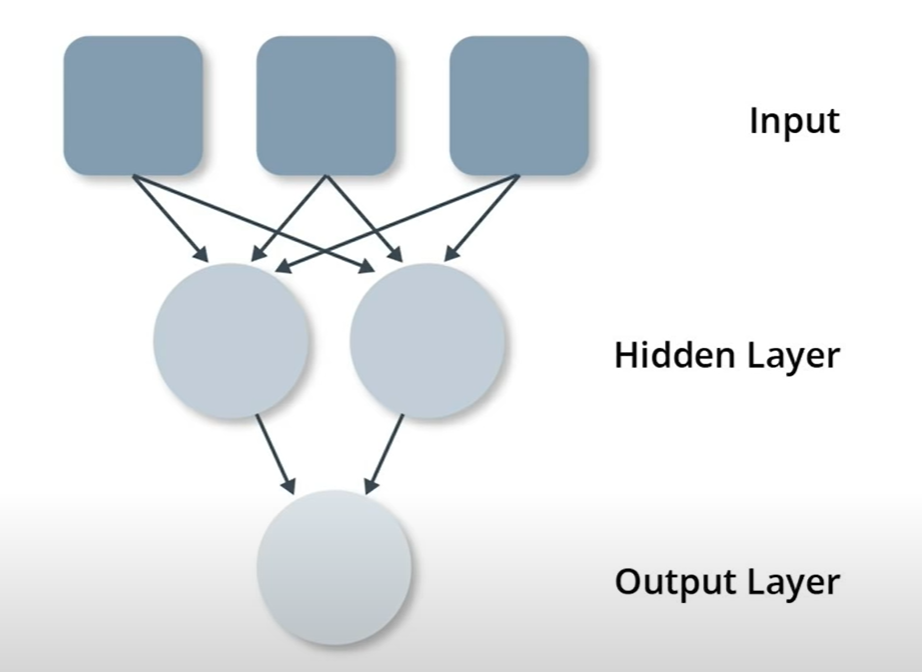

In [ ]:
# to initiate this 

# create the hidden layer
hidden = tf.keras.layers.Dense(units = 2 , input_size = [3])

# create the output  layer
output = tf.keras.layers.Dense(units = 1)

# create the model
model = tf.keras.Sequential([hidden , output])

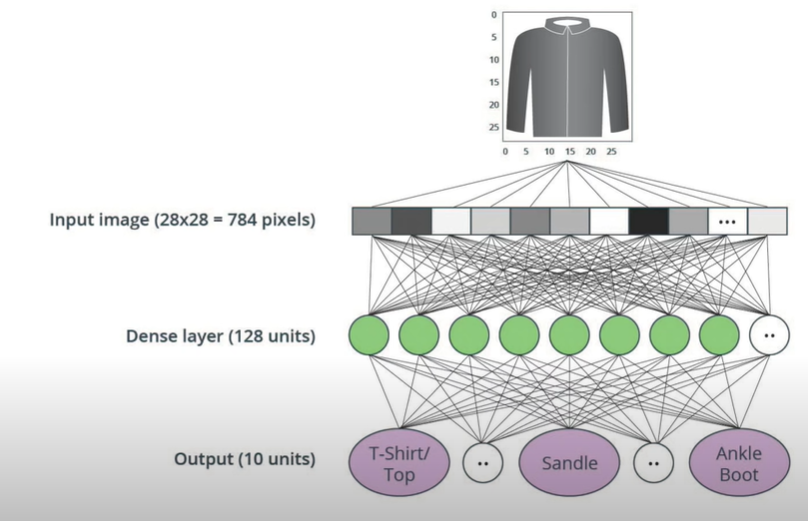

In [3]:
# as each image is 28 x 28 = 784 bytes we need to convert it to 1D array(grayscale images)
# the process of converting a 2D image into 1D vector is called flattening
flatten_layer = tf.keras.layers.Flatten(input_shape = (28 , 28 , 1))

# the next layer is a dense layer which consists of 128 neurons for that layer we use ReLU function as the activation function
dense_layer = tf.keras.layers.Dense(units = 128 , activation = tf.nn.relu)

# for the output layer we need to classify the image to one of these classes
# activation function for that is softmax ==> gives the probabaility for each possible output class
output_layer = tf.keras.layers.Dense(units = 10 , activation = tf.nn.softmax)

In [1]:
# importing the tensorflow datasets
import tensorflow_datasets as tfds

# load the fashion mninst dataset
# as_supervised=True: This parameter indicates that you want to load the dataset in a supervised fashion, 
# where each sample is returned as a tuple of an image and its corresponding label.
# with_info=True: This parameter indicates that you also want to retrieve additional information about the dataset, including its metadata.
# dataset ==> contains the loaded dataset
# metadata ==> contains no.of samples , image dimensions and class labels
dataset , metadata = tfds.load('fashion_mnist' , as_supervised = True , with_info = True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete70JLPR/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete70JLPR/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [3]:
# seperate the dataset as train and test
train_dataset, test_dataset = dataset['train'], dataset['test']

# get the classification labels
class_names = metadata.features['label'].names

print(class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [29]:
metadata

tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_path=PosixGPath('/tmp/tmp9jbl_69ctfds'),
    file_format=tfrecord,
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao a

In [5]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples

# get the number of train examples
print(f"Number of train examples : {num_train_examples}")

# get the number of test examples
print(f"Number of test examples : {num_test_examples}")

Number of train examples : 60000
Number of test examples : 10000


In [8]:
# normalize the each pixel to a range of [0 , 1]
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

# The first time you use the dataset, the images will be loaded from disk
# Caching will keep them in memory, making training faster
train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()

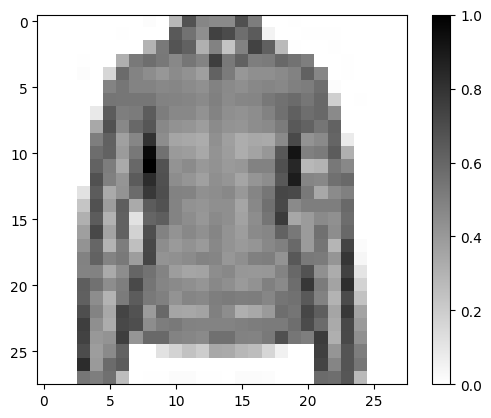

In [9]:
# Take a single image, and remove the color dimension by reshaping
import matplotlib.pyplot as plt

for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
# create the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28 , 28 , 1)),
    tf.keras.layers.Dense(units = 128 , activation = tf.nn.relu),
    tf.keras.layers.Dense(units = 10 , activation = tf.nn.softmax)
])

In [12]:
# compile the model
model.compile(
    # use this when doing classification
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam' , #default learning rate = 0.001
    # we want to see the accuracy metric while training
    metrics = ['accuracy'])

In [13]:
BATCH_SIZE = 32 #number of samples that will be propagated through the model at once before updating the model's parameters.

# cache ==> caches the training dataset
# repeat ==> repeat the dataset indefinitely until the training process is explicitly stopped.
# shuffle ==> helps introduce randomness and reduces the potential bias in the order of samples during training.
# batch ==> batches the dataset into mini-batches size of 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [17]:
# train the model
import math

# number of batches to iterate with each epoch ==> 60000 / 32 = 1875
model.fit(train_dataset, epochs=5, steps_per_epoch = math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4968 - accuracy: 0.8275
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3680 - accuracy: 0.8655
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3370 - accuracy: 0.8765
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3074 - accuracy: 0.8873
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2927 - accuracy: 0.8934


In [19]:
# evaluate the model accuracy for the test dataset

# set the total number of batches to ==> 10000 / 32
# this will return the scalar test loss and the list of metrics
test_loss , test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))

print(f'Model test loss {test_loss} and accuracy {test_accuracy}')

313/313 [==============================] - 0s 1ms/step - loss: 0.3380 - accuracy: 0.8792
Model test loss 0.33802199363708496 and accuracy 0.8791999816894531


In [20]:
# take the first batch from the test_dataset as it has been batched already and that batch will contain the test_images and their corresponding classes
for test_images, test_labels in test_dataset.take(1):

  # convert the tensorflow object to numpy array
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()

  # make predictions on the test images
  predictions = model.predict(test_images)

1/1 [==============================] - 0s 144ms/step


In [21]:
predictions.shape

(32, 10)

In [30]:
# view the predictions for the first image
predictions[0]

array([1.12346075e-04, 1.71392676e-05, 3.22474279e-02, 9.10895778e-07,
       9.25694942e-01, 1.98808241e-08, 4.18749638e-02, 2.33576003e-09,
       5.21482107e-05, 2.92743287e-08], dtype=float32)

In [31]:
# view which label has the highest confidence value
np.argmax(predictions[0])

4

In [32]:
# view the class that the first image belongs
test_labels[0]

4

## Exercises

In [52]:
# importing the required modules
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

In [53]:
# load the fashion_mninst dataset
dataset , metadata = tfds.load('fashion_mnist' , as_supervised=True , with_info=True)

In [54]:
dataset

{'train': <_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 'test': <_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}

In [55]:
metadata

tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_path='/root/tensorflow_datasets/fashion_mnist/3.0.1',
    file_format=tfrecord,
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    

In [56]:
# split the dataset to train and test
train_dataset , test_dataset = dataset['train'] , dataset['test']

In [57]:
# view the class names
metadata.features['label'].names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [58]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples

# get the number of train examples
print(f"Number of train examples : {num_train_examples}")

# get the number of test examples
print(f"Number of test examples : {num_test_examples}")

Number of train examples : 60000
Number of test examples : 10000


In [59]:
# without normalizing create the model
# create the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28 , 28 , 1)),
    # use 512 neurons
    tf.keras.layers.Dense(units = 512 , activation = tf.nn.relu),
    tf.keras.layers.Dense(units = 10 , activation = tf.nn.softmax)
])

In [60]:
# compile the model
model.compile(
    # use this when doing classification
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam' , #default learning rate = 0.001
    # we want to see the accuracy metric while training
    metrics = ['accuracy'])

In [61]:
BATCH_SIZE = 32 #number of samples that will be propagated through the model at once before updating the model's parameters.

# cache ==> caches the training dataset
# repeat ==> repeat the dataset indefinitely until the training process is explicitly stopped.
# shuffle ==> helps introduce randomness and reduces the potential bias in the order of samples during training.
# batch ==> batches the dataset into mini-batches size of 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [45]:
# train the model
import math

# number of batches to iterate with each epoch ==> 60000 / 32 = 1875
model.fit(train_dataset, epochs=5, steps_per_epoch = math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 12s 4ms/step - loss: 4.1648 - accuracy: 0.7668
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5410 - accuracy: 0.8183
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4960 - accuracy: 0.8331
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4973 - accuracy: 0.8309
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4731 - accuracy: 0.8398


In [62]:
# when the epoch size == 1
# number of batches to iterate with each epoch ==> 60000 / 32 = 1875
model.fit(train_dataset, epochs=1, steps_per_epoch = math.ceil(num_train_examples/BATCH_SIZE))

'''
We can observe that when the epoch size is low there is a huge loss and low accuracy

'''

1875/1875 [==============================] - 12s 4ms/step - loss: 4.3251 - accuracy: 0.7603


In [46]:
# evaluate the model accuracy for the test dataset

# set the total number of batches to ==> 10000 / 32
# this will return the scalar test loss and the list of metrics
test_loss , test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))

print(f'Model test loss {test_loss} and accuracy {test_accuracy}')

313/313 [==============================] - 2s 5ms/step - loss: 0.5326 - accuracy: 0.8252
Model test loss 0.5326105356216431 and accuracy 0.8252000212669373


In [47]:
# take the first batch from the test_dataset as it has been batched already and that batch will contain the test_images and their corresponding classes
for test_images, test_labels in test_dataset.take(1):

  # convert the tensorflow object to numpy array
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()

  # make predictions on the test images
  predictions = model.predict(test_images)

1/1 [==============================] - 0s 102ms/step


In [48]:
predictions[0]

array([5.7257753e-06, 3.3122635e-06, 7.5985650e-03, 3.1097787e-03,
       9.8110086e-01, 3.7680602e-11, 8.1755510e-03, 6.8340419e-26,
       6.0388634e-06, 1.0535244e-21], dtype=float32)

In [50]:
test_labels[0]

4